In [1]:
import os
import glob
from tqdm import tqdm
from datetime import datetime
import numpy as np
import pandas as pd
import xarray as xr
import rioxarray as rxr
import matplotlib.pyplot as plt

In [2]:
output_arr = np.load("test_arrays.npy")
output_arr.shape

(1, 127, 74, 147, 1)

In [4]:
time = np.load("../data/arrays/time.npy")[-output_arr.shape[1] :]
time.shape

(127,)

In [5]:
output_arr = output_arr[0, -10 * 10 :, :, :, 0]
output_arr.shape

(100, 74, 147)

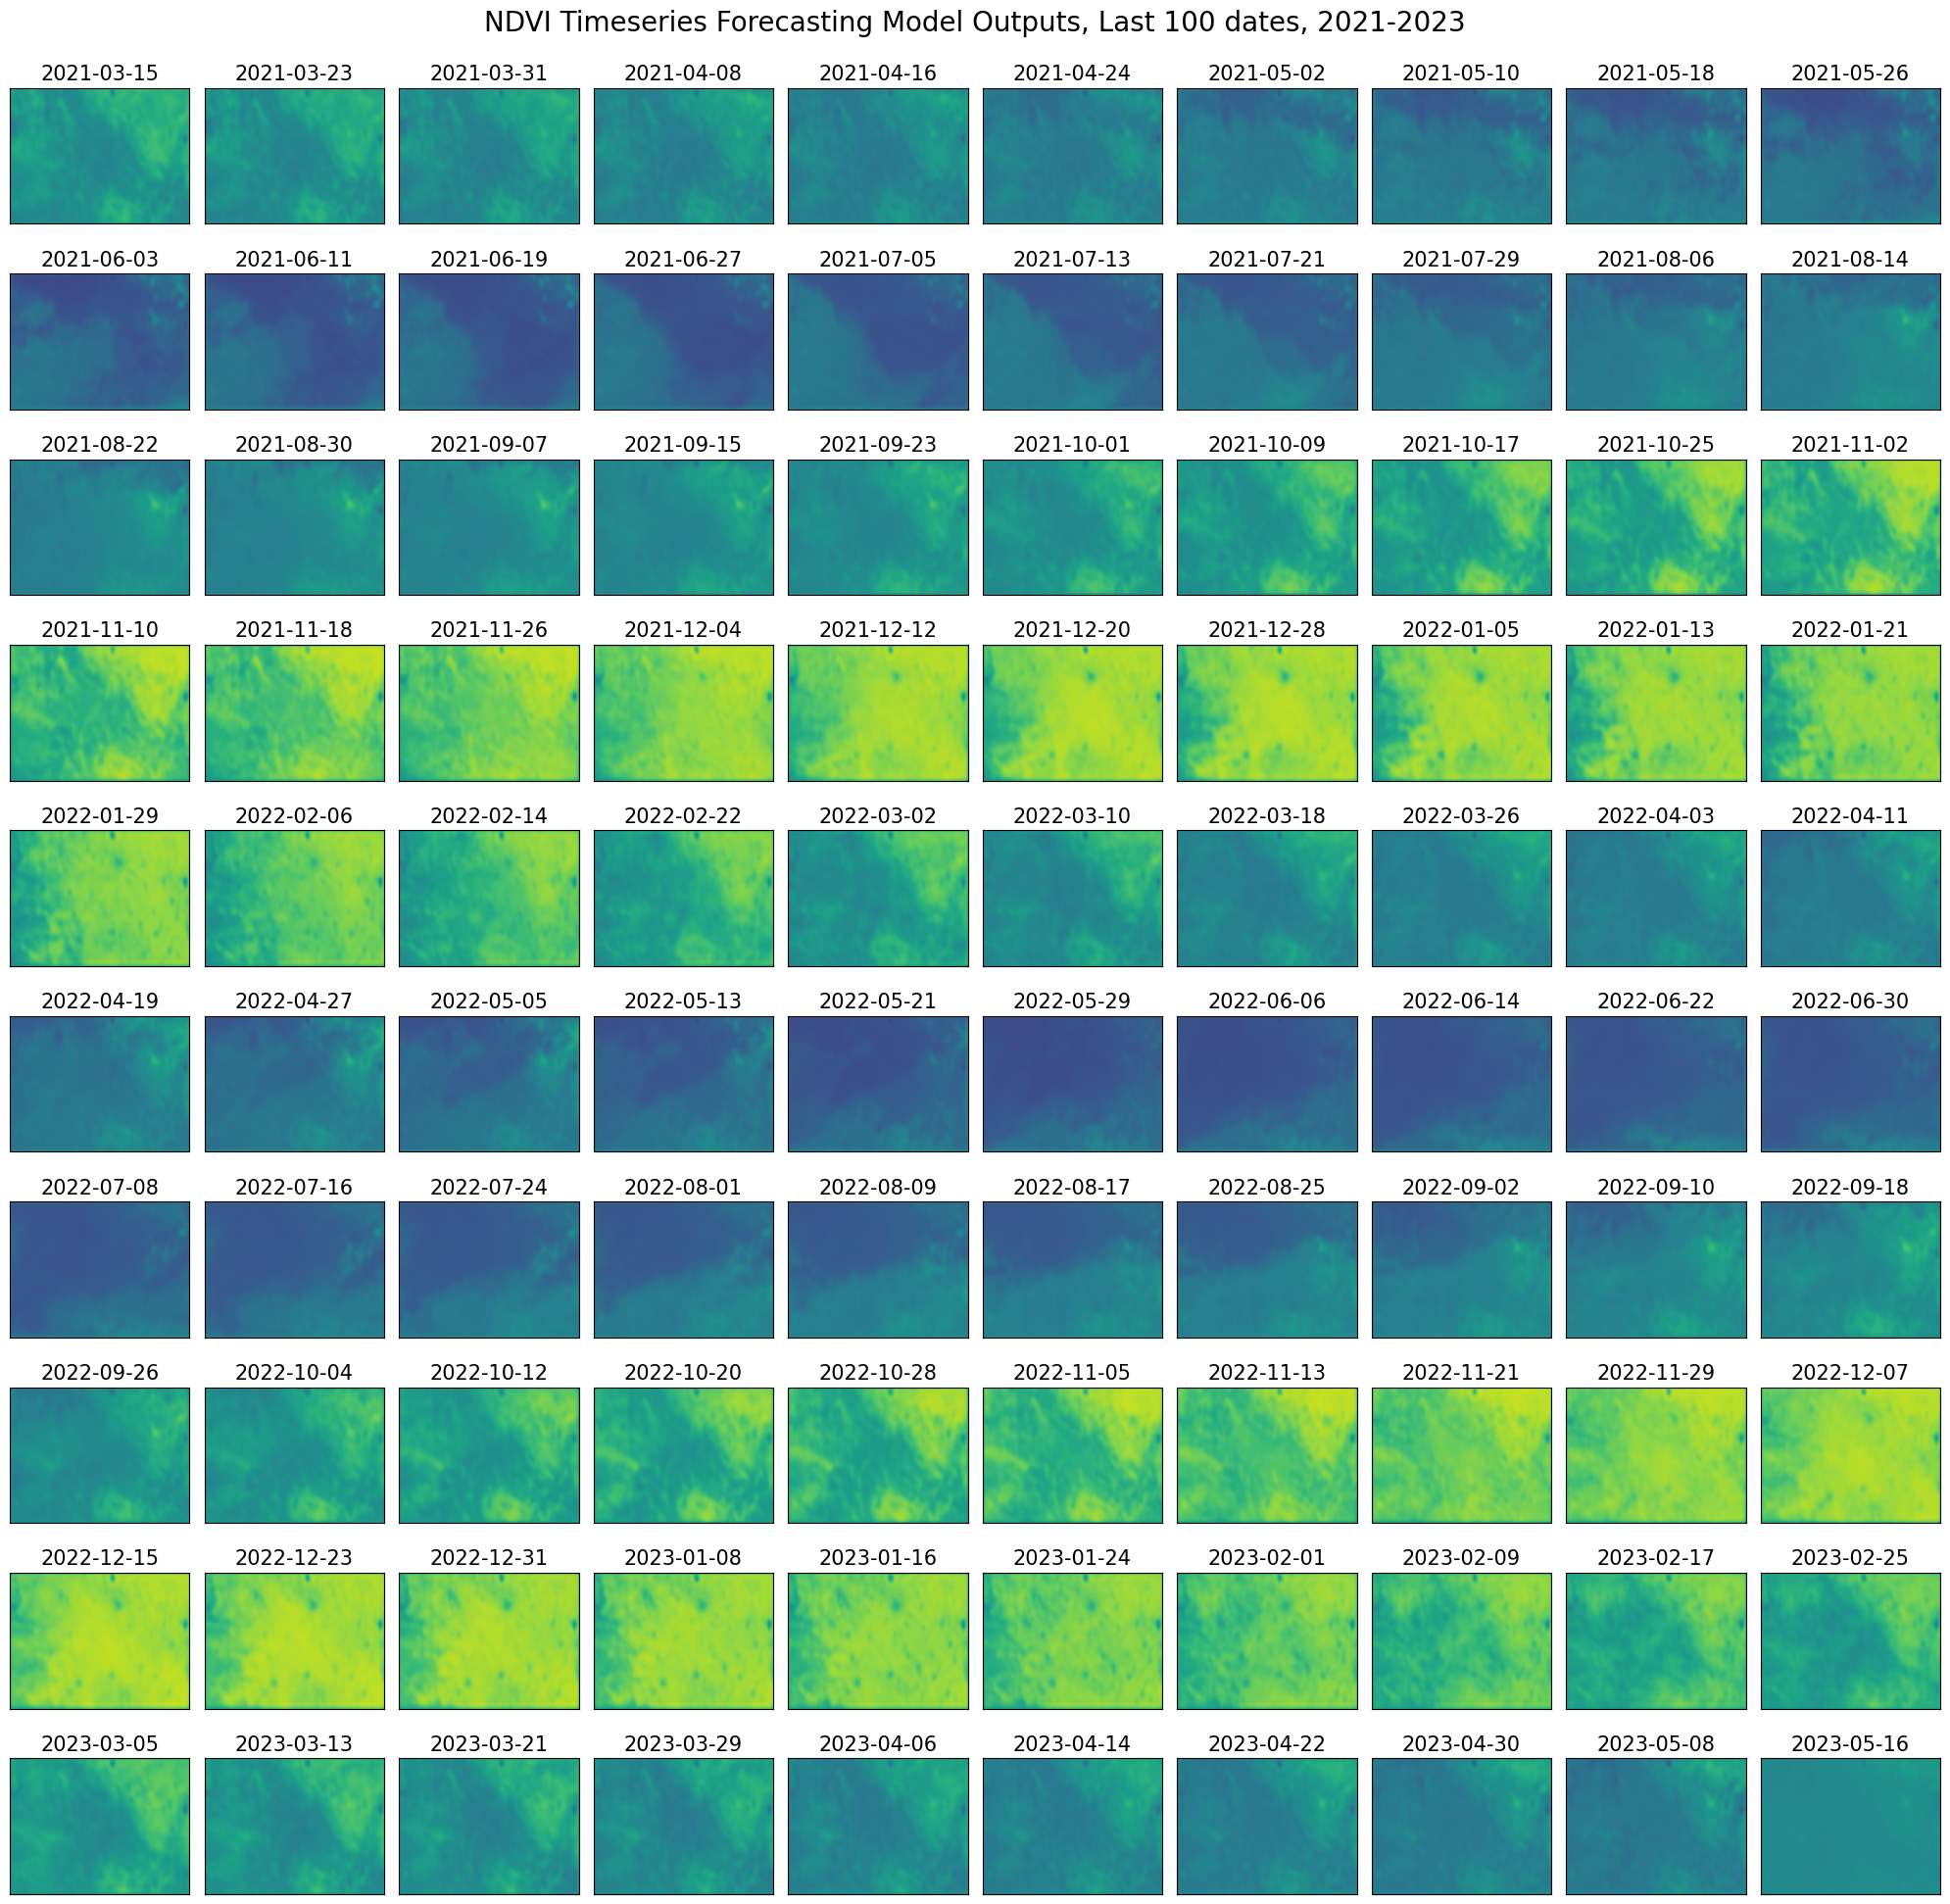

In [6]:
rows, cols = 10, 10

vmin = 0
vmax = 1

fig, axes = plt.subplots(rows, cols, figsize=(20, 20))  # , sharex=True, sharey=True)
axes = axes.ravel()
for i in range(len(axes)):
    date = str(time[i])[:10]
    axes[i].set_title(date, fontsize=15)
    axes[i].imshow(
        output_arr[i],
        aspect=1.5,
        vmin=vmin,
        vmax=vmax,
    )
    axes[i].axes.xaxis.set_ticks([])
    axes[i].axes.yaxis.set_ticks([])

plt.suptitle(
    "NDVI Timeseries Forecasting Model Outputs, Last 100 dates, 2021-2023\n",
    fontsize=20,
)
plt.tight_layout()
plt.savefig("output_image_timeseries.png")
plt.show()